<a href="https://colab.research.google.com/github/JoseFBG/CIENCIA_DATOS_2025/blob/main/Clase_27_de_octubre_preguntas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ANÁLISIS EXPLORATORIO DE DATOS EDA

Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, minimizando la comprensión del conjunto de datos.

#Pasos del EDA
1. Realizar un análisis descriptivo de las variables
2. Re-ajustar tipos de variables que no sean consistentes en el momento de realizar las operaciones
3. Detectar y tratar datos ausentes (NaN) que nos permitirá procesar adecuadamente variables numéricas
4. Identificar datos atípicos y tratarlos de forma adecuada. Esto mitigará la distorsión de futuros análisis estadísticos
5. Realizar un examen numérico y gráfico de las relaciones entre variables analizadas determinando su grado de correlación

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
notas=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Notes.csv")
notas

,Variable,Definition,Key
0,PassengerId,Passenger ID,NaN
1,Survival,Survival,"0 = No, 1 = Yes"
2,Pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Pasenger name,NaN
4,Sex,Sex,NaN
5,Age,Age in years,NaN
6,Sibsp,# of siblings / spouses aboard the Titanic,NaN
7,Parch,# of parents / children aboard the Titanic,NaN
8,Ticket,Ticket number,NaN
9,Fare,Passenger fare,NaN


*Survived: 1=Sobrevive, 0=No sobrevive *sibsp: Hermanos o esposos abordo *parch: #Padres o hijos abordo *ticket: Número del tiquete *embarket: Puerto de embarque. S: Southampton, C: Cherbourg, Q:Queenstown *Sex: male/female

##1. Análisis descriptivo

Tomar cada una de las características y analizarla

In [ ]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=["Sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))


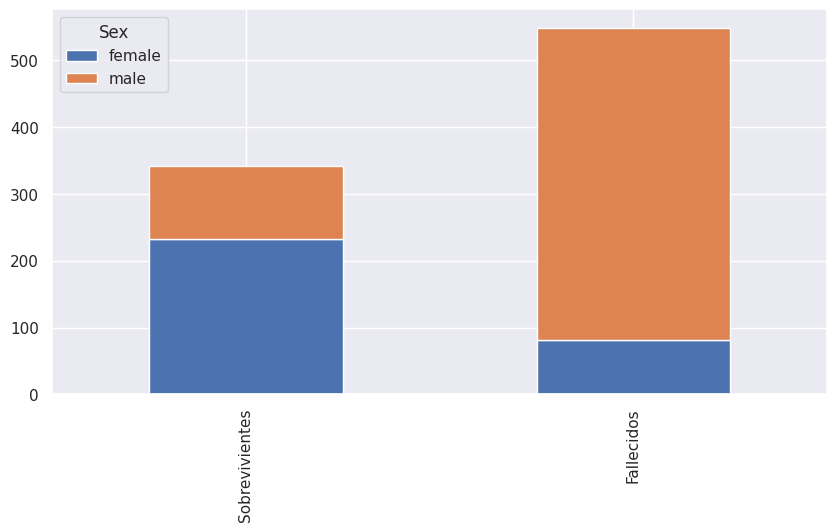

In [ ]:
bar_char("Sex")

Las mujeres mostraron mayor tasa de supervivencia (casi del 60%) en comparación a los hombres

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


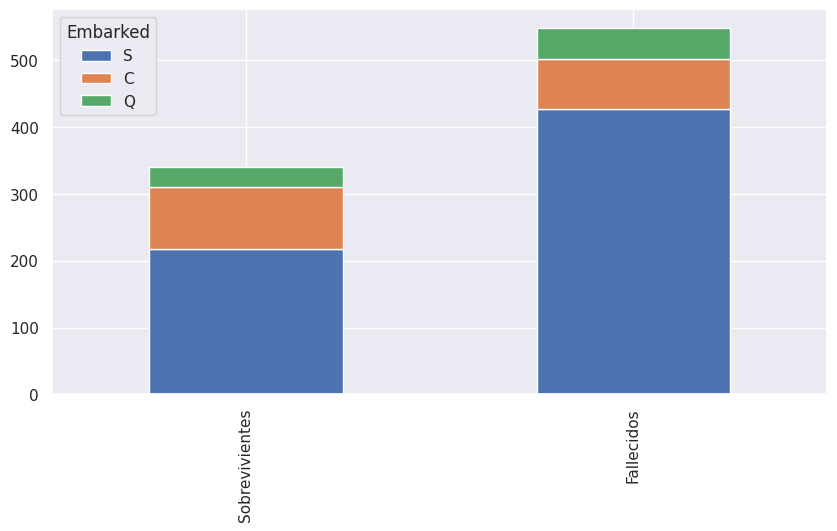

In [ ]:
bar_char("Embarked")

La gráfica señala que los que se montaron en C tienen mayor probabilidad de supervivencia. Los que se montaron en S tienen menor tasa de supervivencia.

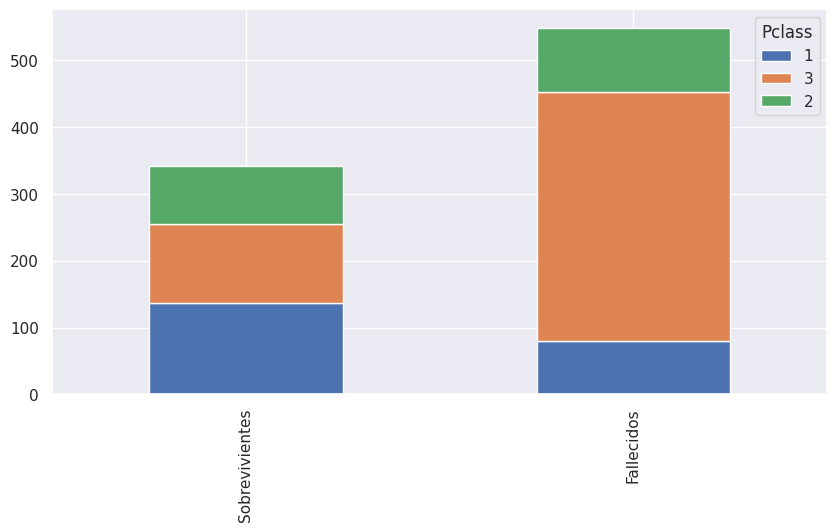

In [ ]:
bar_char("Pclass")

Pclass 1 tiene mayor probabilidad de sobrevivir con respecto a Pclass 3

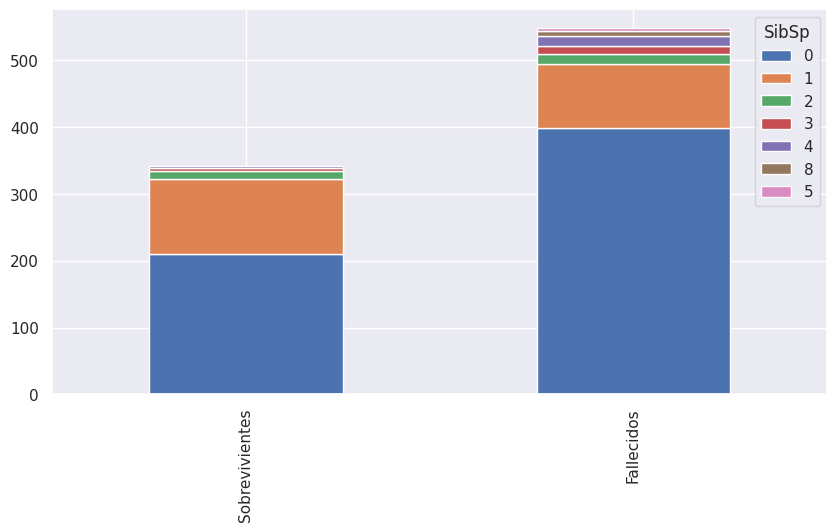

In [ ]:
bar_char("SibSp")

Las personas solteras presentan menor probabilidad de supervivencia en comparación con aquellas casadas o con familia

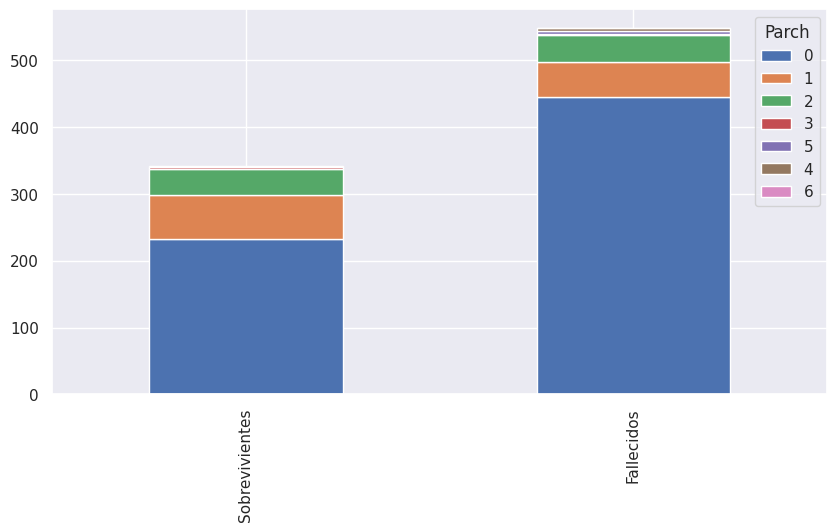

In [ ]:
bar_char("Parch")

La gráfica muestra que la probabilidad de supervivencia aumentaba si tenías entre 1 y 3 hijos. Disminuía si eres soltero o con más de 3 hijos.



##Ingeniería de características

Es el proceso de usar el dominio del conocimiento para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen adecuadamente.

In [ ]:
df.info()

##2. Creando feature vectors

In [ ]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [ ]:
df["Title"]=extract_title(df)

In [ ]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de títulos

Para ello reemplazamos los títulos con los siguientes valores

Mr: 0

*   Mr: 0
*   Miss: 1


*   Mrs:2
*   Otros: 3

In [ ]:
def replace_titles(data):
  title_mapping={"Mr":"Señor","Miss":"Señorita","Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("Otros")
  return data

In [ ]:
df=replace_titles(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


In [ ]:
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Señor
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Señora
2,"Heikkinen, Miss. Laina",Señorita
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Señora
4,"Allen, Mr. William Henry",Señor


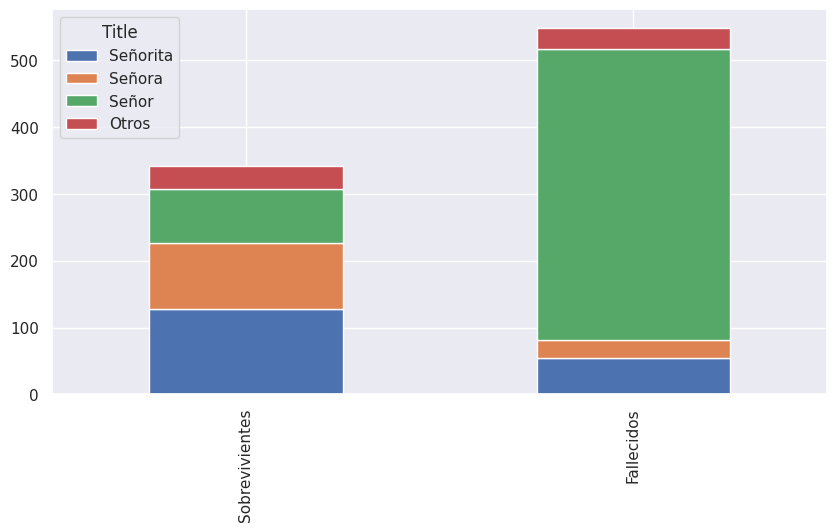

In [ ]:
bar_char("Title")

In [ ]:
#Eliminar la información innecesaria
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


In [ ]:
###2.2 Reparando la edad
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [ ]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [ ]:
df[["Title","Age"]].head(10)

,Title,Age
0,Señor,22.00000
1,Señora,38.00000
2,Señorita,26.00000
3,Señora,35.00000
4,Señor,35.00000
5,Señor,32.36809
6,Señor,54.00000
7,Otros,2.00000
8,Señora,27.00000
9,Señora,14.00000


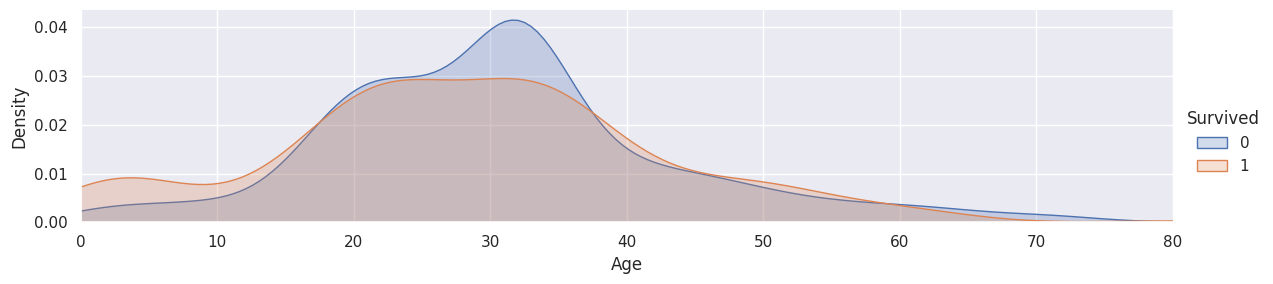

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

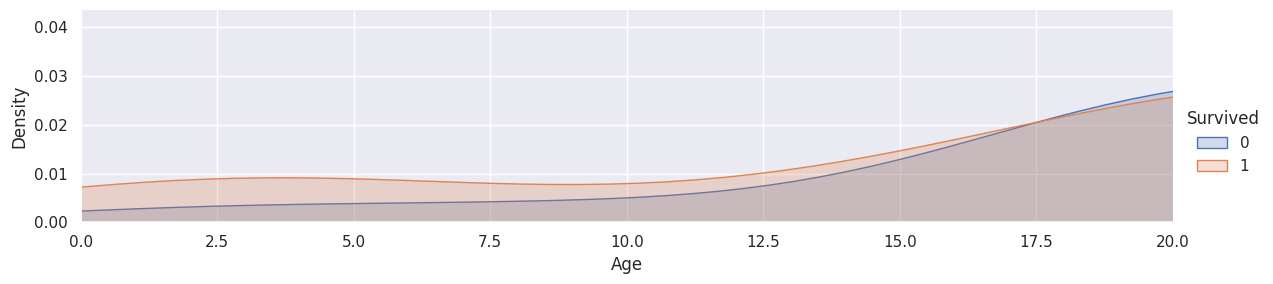

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

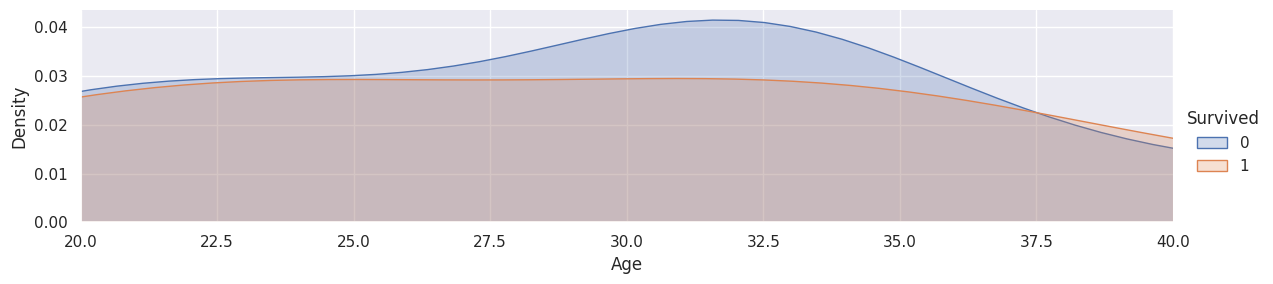

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

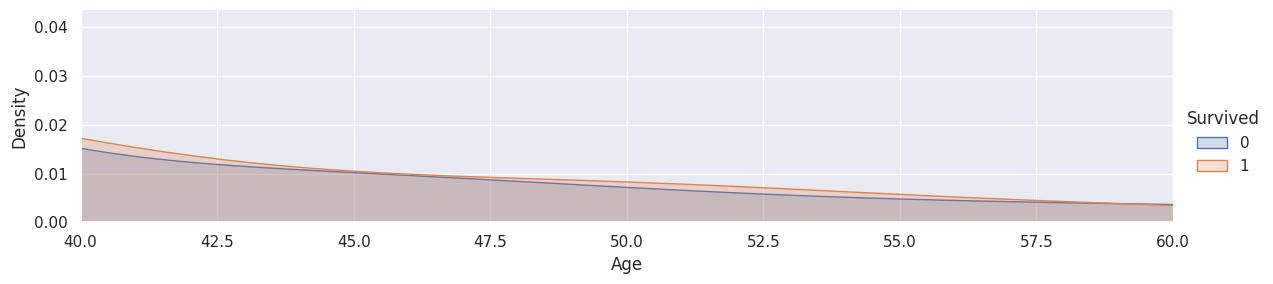

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(40,60)
plt.show()

##2.4 Binning

Convertir una variable numérica a categórica, en este caso, la edad Mapear el feature vector

* niños: 0
* Joven: 1
* adulto: 2
* edad madura: 3
* edad avanzada: 4

In [ ]:
df["Age_category"]=pd.cut(df["Age"],bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_category
0,1,0,3,male,22.00000,1,0,7.2500,S,Señor,1
1,2,1,1,female,38.00000,1,0,71.2833,C,Señora,3
2,3,1,3,female,26.00000,0,0,7.9250,S,Señorita,2
3,4,1,1,female,35.00000,1,0,53.1000,S,Señora,2
4,5,0,3,male,35.00000,0,0,8.0500,S,Señor,2
5,6,0,3,male,32.36809,0,0,8.4583,Q,Señor,2
6,7,0,1,male,54.00000,0,0,51.8625,S,Señor,3
7,8,0,3,male,2.00000,3,1,21.0750,S,Otros,0
8,9,1,3,female,27.00000,0,2,11.1333,S,Señora,2
9,10,1,2,female,14.00000,1,0,30.0708,C,Señora,0


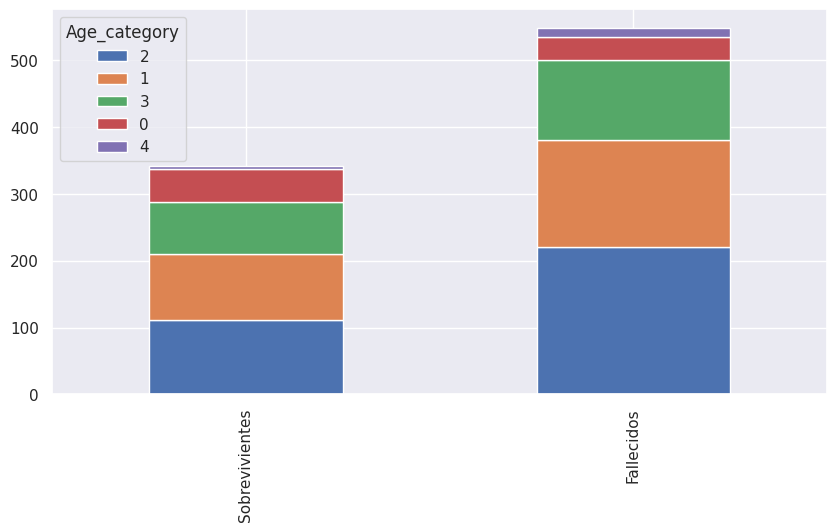

In [ ]:
bar_char("Age_category")

##1. Cantidad total, sobrevivientes y tasa global

In [3]:
total = len(df)
sobrevivientes = df["Survived"].sum()
fallecidos = total - sobrevivientes
tasa_supervivencia = sobrevivientes / total * 100

In [4]:
print(f"Total de pasajeros con datos: {total}")
print(f"Sobrevivientes: {sobrevivientes}")
print(f"Fallecidos: {fallecidos}")
print(f"Tasa global de supervivencia: {tasa_supervivencia:.2f}%")

Total de pasajeros con datos: 891
Sobrevivientes: 342
Fallecidos: 549
Tasa global de supervivencia: 38.38%


##2. Distribución por sexo y clase

In [5]:
sexo = df["Sex"].value_counts()
print("\nDistribución por sexo:")
print(sexo)


Distribución por sexo:
Sex
male      577
female    314
Name: count, dtype: int64


In [6]:
sexo_clase = pd.crosstab(df["Pclass"], df["Sex"], margins=True)
print("\nDistribución por clase y sexo:")
print(sexo_clase)


Distribución por clase y sexo:
Sex     female  male  All
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
All        314   577  891


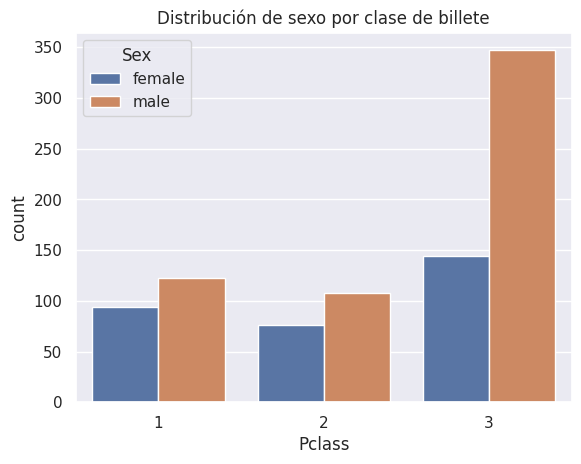

In [7]:
sns.countplot(x="Pclass", hue="Sex", data=df)
plt.title("Distribución de sexo por clase de billete")
plt.show()

##3. Supervivencia por sexo

In [8]:
supervivencia_sexo = df.groupby("Sex")["Survived"].agg(["sum","count"])
supervivencia_sexo["Tasa (%)"] = supervivencia_sexo["sum"]/supervivencia_sexo["count"]*100
print("\nSupervivencia por sexo:")
print(supervivencia_sexo)


Supervivencia por sexo:
        sum  count   Tasa (%)
Sex                          
female  233    314  74.203822
male    109    577  18.890815


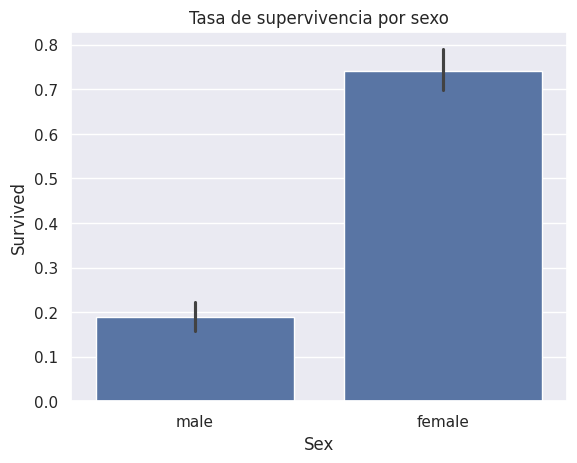

In [9]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Tasa de supervivencia por sexo")
plt.show()

##4. Información sobre edad

In [10]:
faltan_edad = df["Age"].isna().sum()
con_edad = total - faltan_edad
print(f"\nPasajeros con edad registrada: {con_edad}")
print(f"Pasajeros sin edad registrada: {faltan_edad}")


Pasajeros con edad registrada: 714
Pasajeros sin edad registrada: 177


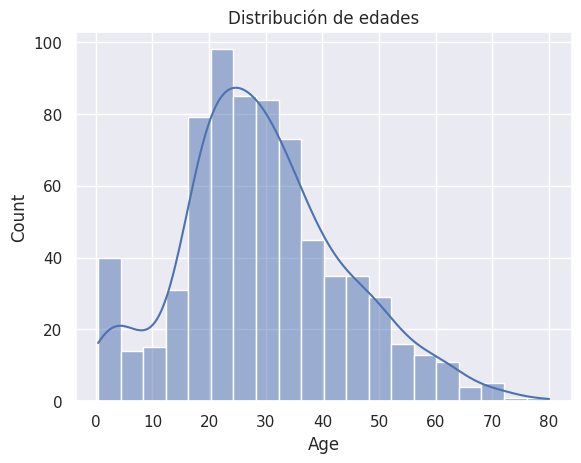

In [11]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribución de edades")
plt.show()

##5. Distribución edad por clase y sexo

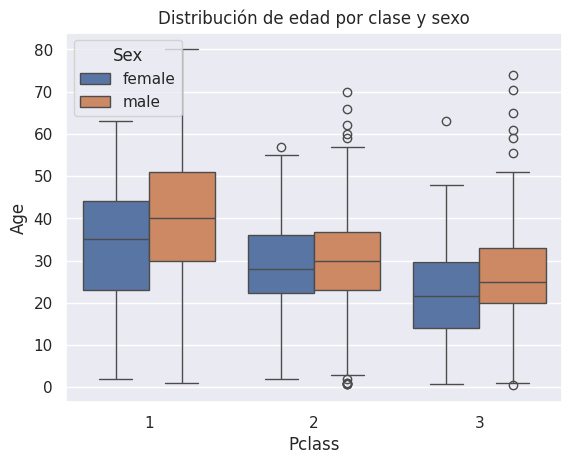

In [12]:
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=df)
plt.title("Distribución de edad por clase y sexo")
plt.show()

##6. Influencia sexo, clase y edad en supervivencia

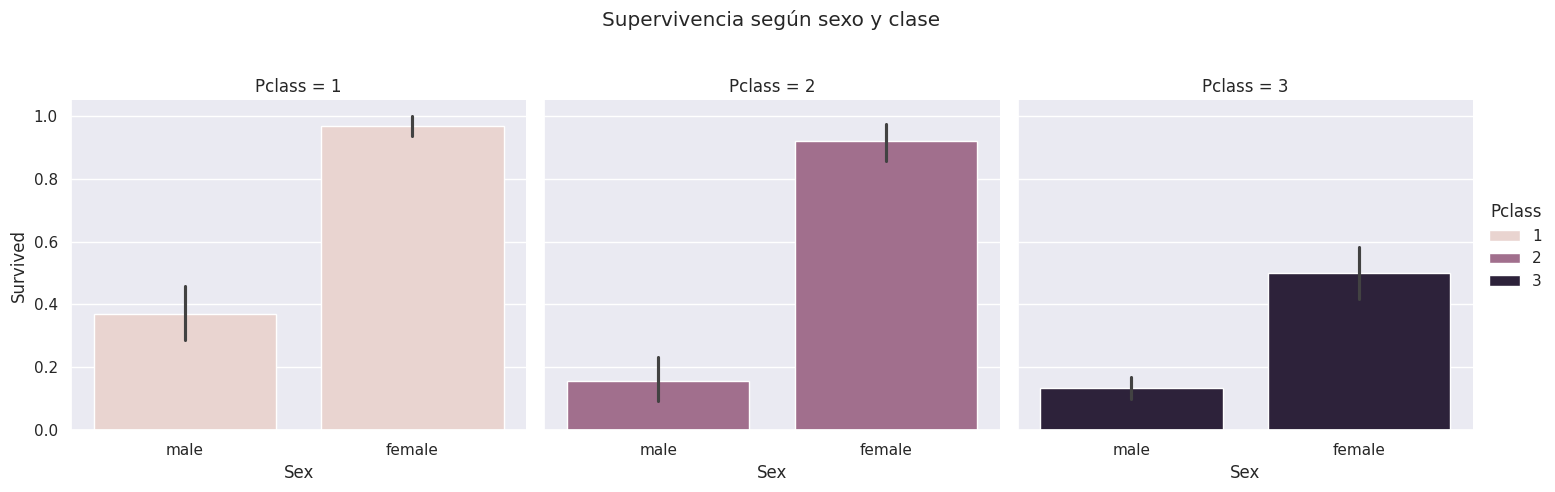

In [13]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", col="Pclass",
            kind="bar", data=df)
plt.subplots_adjust(top=0.8)
plt.suptitle("Supervivencia según sexo y clase")
plt.show()

##7. Distribución de miembros de familia (SibSp + Parch)

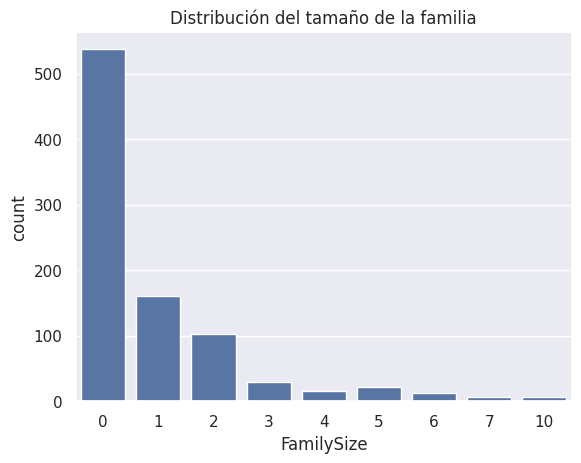

In [14]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
sns.countplot(x="FamilySize", data=df)
plt.title("Distribución del tamaño de la familia")
plt.show()

In [15]:
familia = df["FamilySize"].value_counts().sort_index()
print("\nDistribución del número de familiares a bordo:")
print(familia)


Distribución del número de familiares a bordo:
FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


##8. Clase de billete y familias numerosas

In [16]:
familias_numerosas = df[df["FamilySize"] >= 3]
print("\nDistribución de familias numerosas por clase de billete:")
print(familias_numerosas["Pclass"].value_counts())


Distribución de familias numerosas por clase de billete:
Pclass
3    63
2    15
1    13
Name: count, dtype: int64


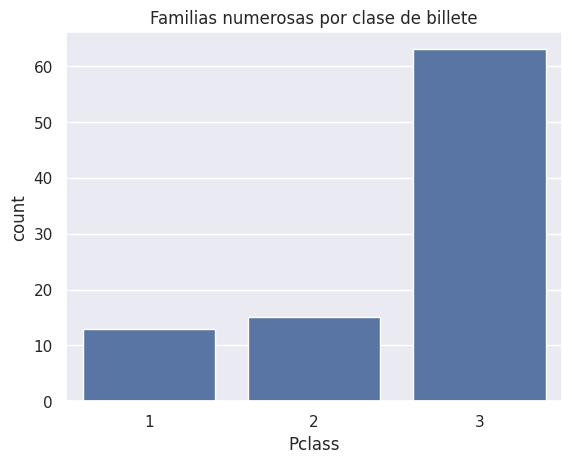

In [17]:
sns.countplot(x="Pclass", data=familias_numerosas)
plt.title("Familias numerosas por clase de billete")
plt.show()

##9. Tarifa media por persona (corrigiendo tickets compartidos)

In [18]:
df["GroupCount"] = df.groupby("Ticket")["Ticket"].transform("count")
df["Fare_per_person"] = df["Fare"] / df["GroupCount"]

In [19]:
tarifa_media = df["Fare_per_person"].mean()
print(f"\nTarifa media por persona (corrigiendo grupos): {tarifa_media:.2f}")


Tarifa media por persona (corrigiendo grupos): 17.79


##10. Distribución de tarifa por clase de billete

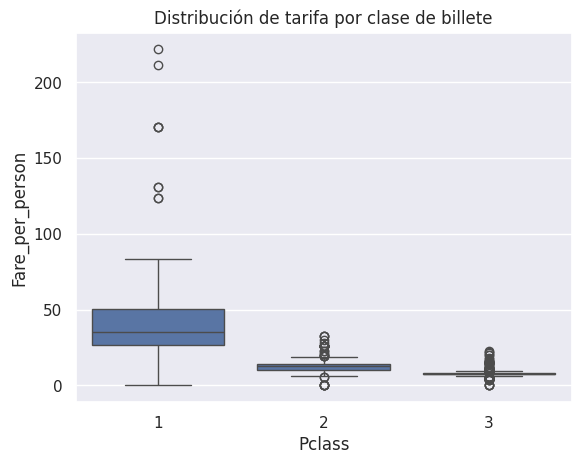

In [20]:
sns.boxplot(x="Pclass", y="Fare_per_person", data=df)
plt.title("Distribución de tarifa por clase de billete")
plt.show()

In [21]:
tarifa_por_clase = df.groupby("Pclass")["Fare_per_person"].describe()
print("\nDistribución de tarifa por clase:")
print(tarifa_por_clase)


Distribución de tarifa por clase:
        count       mean        std  min    25%      50%        75%       max
Pclass                                                                       
1       216.0  43.650347  30.322236  0.0  26.55  35.2500  50.660392  221.7792
2       184.0  13.322599   5.648278  0.0  10.50  13.0000  13.858658   32.5000
3       491.0   8.085857   2.393923  0.0   7.25   7.8542   8.050000   22.5250
